# Unsupervised Learning: Principal Component Analysis

Real world data can have very large dimensions i.e attributes. Visualizing and analysing 4 dimensional data can be challenging and difficult. This difficulty increases exponentially with the number of dimensions. 

This well known issue is identified as *the curse of dimensionality*.

PCA stands for principal component analysis. It is a linear dimensionality reduction technique which projects data into a lower dimensional space. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.simplefilter(action='ignore', category=DataConversionWarning)

In [82]:
# Load the data
df = pd.read_csv("credit_train.csv")

df = df[['Current Loan Amount','Credit Score','Annual Income','Years of Credit History',
            'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
           'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens', 'Loan Status']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 12 columns):
Current Loan Amount             100000 non-null float64
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax Liens                       99990 non-null float64
Loan Status                     100000 non-null object
dtypes: float64(11), object(1)
memory usage: 9.2+ MB


In [88]:
def siivoaData(data, slice=1.0):

    # Mikä on muuttuja josta olemme kiinnostuneita?
    # Haluamme tietysti ymmärtää muuttujaa lainan tilanne "Loan staus"
    # Dikotominne muuttuja kuvaa sitä maksetaanko laina takaisin vai ei.


    #Annetaan keskiarvot puutuville tietopisteille
    sarakkeet =['Current Loan Amount','Credit Score','Annual Income','Years of Credit History',
            'Months since last delinquent','Number of Open Accounts','Number of Credit Problems',
           'Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']
    muuttujanTäyttäjä = Imputer()
    data[sarakkeet] = muuttujanTäyttäjä.fit_transform(data[sarakkeet])
    data[sarakkeet] = data[sarakkeet].astype(int)

    #Poistetaan vielä NaN rivit
    data=data.dropna()

#     Note:  Select only some of the data for testing purposes!
    if slice > 0 and slice < 1:
        mid_point = int(len(data)*slice)
        data = data.loc[:mid_point]


    #Valitaan muuttuja josta olemme kiinnostuneita ja koodataan se
    y = data['Loan Status']
    new_y = []
    for i in y:
        if i == 'Fully Paid':
            new_y.append(1)
        else:
            new_y.append(0)
    data = data.drop('Loan Status', axis=1)

    # Koodataan kategoriset muuttujat
    data = pd.get_dummies(data)

    # Normalisoidaan data
    # Palautamme myös dataMean ja dataDev arvot jos haluamme syöttää koneelle uusia havaintoja
    dataMean = np.mean(data, axis=0)
    dataDev = np.std(data, axis=0)
    norm_x = (data - dataMean) / dataDev

    x = data.values #muutetaan numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normMinMax = pd.DataFrame(x_scaled)
    
    

    return norm_x, normMinMax, data, new_y, dataMean, dataDev


xNorm, xMinMax, xNoNorm, y, xMean, xDev = siivoaData(df)

xNorm.head()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,-0.356000,-0.276927,-2.167902e-01,-0.109538,-0.028035,-1.023690,1.722987,-0.176642,-0.041035,2.513503,-0.113531
1,-0.361761,-0.000278,-4.655080e-07,0.459993,-1.753905,4.764912,-0.348683,-0.171894,0.010733,-0.334659,-0.113531
2,2.776244,-0.252805,8.779410e-01,-0.536686,-0.359933,1.371593,1.722987,0.008928,-0.001277,-0.334659,-0.113531
3,-0.359076,-0.267881,-5.876086e-01,-0.821452,-0.028035,-0.424869,-0.348683,-0.101838,-0.044588,-0.334659,-0.113531
4,-0.364470,-0.000278,-4.655080e-07,-1.675749,-0.028035,0.772772,-0.348683,-0.109465,-0.039791,-0.334659,-0.113531


In [84]:
# Run PCA with n_components==number of attributes
pca = PCA(n_components=11)
reducedX = pca.fit_transform(xMinMax)
print("Explained variance of 11 components:\n", pca.explained_variance_ratio_)

Explained variance of 11 components:
 [6.17631047e-01 2.20020859e-01 6.77763177e-02 4.47852547e-02
 2.57832722e-02 1.90402355e-02 3.53274757e-03 7.33500795e-04
 3.35334190e-04 1.86065792e-04 1.75366250e-04]


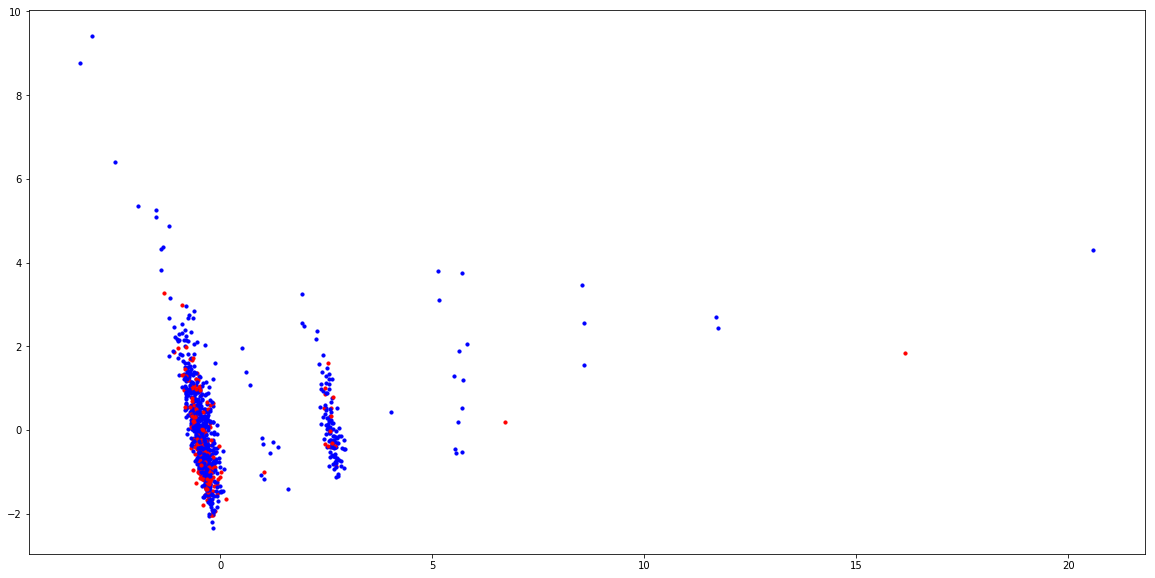

In [85]:
# Run PCA with 2 components, for 2d visualising.
pca = PCA(n_components=2)

# Reduce L2-Normalized data
reducedX = pca.fit_transform(xNorm)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in y]
for dp, c in zip(reducedX[:1000], colors[:1000]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

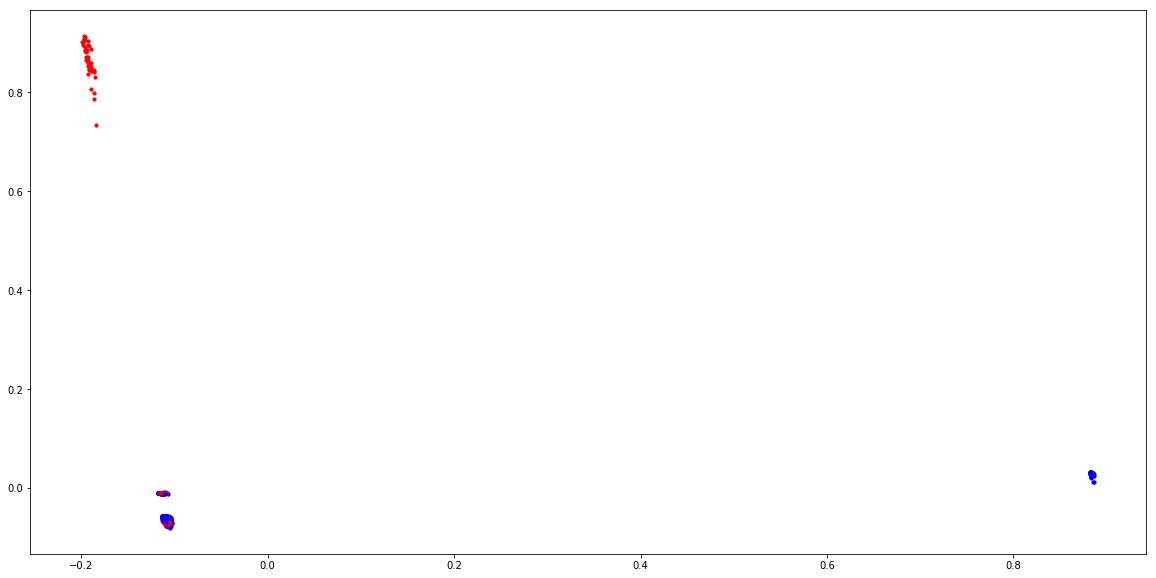

In [86]:

# Reduce MinMax-Normalized data

reducedX = pca.fit_transform(xMinMax)

fig, ax = plt.subplots(figsize=(20, 10))

colors = ['blue' if l==1 else 'red' for l in y]
for dp, c in zip(reducedX[:1000], colors[:1000]):
    ax.scatter(dp[0], dp[1], s=10, color=c)
plt.show()

In [90]:
#Perform predictions with reduced dimensionality
xNorm, xMinMax, xNoNorm, y, xMean, xDev = siivoaData(df)

for n_comp in range(1, 12):
    pca = PCA(n_components=n_comp)
    reducedX = pca.fit_transform(xNorm)
    X_train, X_test, y_train, y_test = train_test_split(reducedX, y, test_size=0.5, random_state=13)

    clf = LogisticRegression().fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))

    print('Accuracy with {} components: {:.4f}%'.format(n_comp, 100*score))

Accuracy with 1 components: 77.5520%
Accuracy with 2 components: 77.5520%
Accuracy with 3 components: 81.9360%
Accuracy with 4 components: 81.9940%
Accuracy with 5 components: 82.0200%
Accuracy with 6 components: 82.0200%
Accuracy with 7 components: 82.0200%
Accuracy with 8 components: 82.0180%
Accuracy with 9 components: 82.0140%
Accuracy with 10 components: 82.0100%
Accuracy with 11 components: 82.0100%
